In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xmitgcm  # see 
import xarray as xr  # see http://xarray.pydata.org/en/stable/plotting.html
%matplotlib notebook

In [30]:
datad = '../runs/RunFr216/'
ds = xmitgcm.open_mdsdataset(datad,prefix={'PH','T','U'},endian='<',iters=np.arange(150,3001,150))
# make new x in km for plotting
ds=ds.assign_coords(XC0 = ds.XC/1000.-ds.XC.mean()/1000.)
ds=ds.assign_coords(XG0 = (ds.XG-ds.XC.mean())/1000.)
TRef=ds['T'][0,:,0,0]

In [28]:
print(ds)

<xarray.Dataset>
Dimensions:  (i: 80, i_g: 80, j: 1, j_g: 1, k: 25, k_l: 25, k_p1: 26, k_u: 25, time: 20)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j_g      (j_g) int64 0
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    XC       (j, i) float64 1.237e+04 3.629e+04 5.859e+04 7.925e+04 ...
    YC       (j, i) float64 2.5e+03 2.5e+03 2.5e+03 2.5e+03 2.5e+03 2.5e+03 ...
    XG       (j_g, i_g) float64 7.276e-12 2.474e+04 4.785e+04 6.933e+04 ...
    YG       (j_g, i_g) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Zl       (k_l) float64 0.0 -80.0 -160.0 

In [32]:
fig,ax = plt.subplots()
T0 = ds['T'][0,:,:,:]
T= ds['U'][-1,:,0,:]
T = np.ma.masked_where(T0[:,0,:]==0,T)
pcm=ax.pcolormesh(ds['XG0'][0,:], ds['Zp1'],T-0.056,vmin=-0.2,vmax=0.2,cmap='RdBu_r')
ax.contour(ds['XC0'][0,:], ds['Z'],ds['T'][-1,:,0,:],TRef[::3],colors='k',)
ax.plot(ds['XC0'][0,:],-ds['Depth'][0,:])
ax.set_xlim([-20.,20.])
fig.colorbar(pcm, ax=ax,shrink=0.5,extend='both')
ax.set_xlabel('X [km]')
ax.set_ylabel('Z [m]')
ax.set_title('U [m/s]',loc='left')

<IPython.core.display.Javascript object>

ValueError: Contour levels must be increasing

<IPython.core.display.Javascript object>


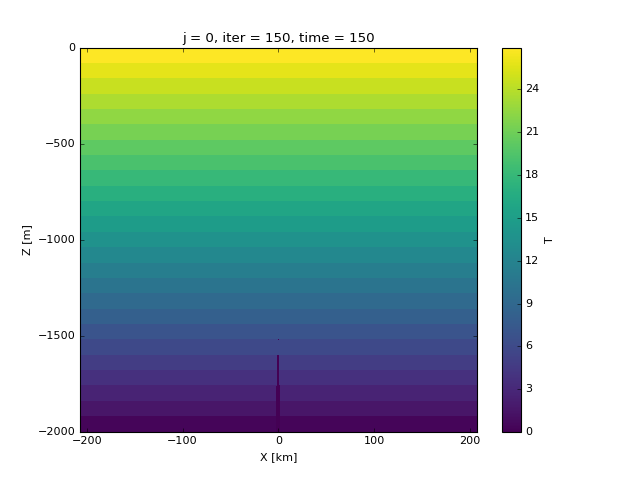

In [11]:
fig,ax = plt.subplots()
tt.plot(x='XC0',y='Z',ax=ax)
ax.set_xlabel('X [km]')
ax.set_ylabel('Z [m]')
